In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


In [54]:
train_file_path = 'TrainDataset.csv'
test_file_path = 'TestDataset.csv'

# Charger les données d'entraînement
train_data = pd.read_csv(train_file_path)
# Charger les données de test
test_data = pd.read_csv(test_file_path)

# Séparer les caractéristiques (X) et les étiquettes (y) dans les données d'entraînement
X_train = train_data.iloc[2:, 1:-1].values

y_train = train_data.iloc[2:, -1].apply(lambda x: x.strip("'[]'"))

# Séparer les caractéristiques (X) et les étiquettes (y) dans les données de test
X_test = test_data.iloc[2:, 1:-1].values
y_test = test_data.iloc[2:, -1].apply(lambda x: x.strip("'[]'"))

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[' 87.0' ' 120.0' ' 73.0' ... ' 127.0' ' 0.0' ' 98.0']
 [' 87.0' ' 120.0' ' 73.0' ... ' 126.0' ' 0.0' ' 98.0']
 [' 88.0' ' 121.0' ' 73.0' ... ' 126.0' ' 0.0' ' 98.0']
 ...
 [' 71.0' ' 96.0' ' 59.0' ... ' 128.0' ' 0.0' ' 88.0']
 [' 72.0' ' 97.0' ' 59.0' ... ' 128.0' ' 0.0' ' 88.0']
 [' 72.0' ' 98.0' ' 59.0' ... ' 128.0' ' 0.0' ' 88.0']]
2          'Normal
3          'Normal
4          'Normal
5          'Normal
6          'Normal
           ...    
3512       'Normal
3513     'Critical
3514     'Critical
3515     'Critical
3516     'Critical
Name: 'classe', Length: 3515, dtype: object
[[ 78. 104.  65. ... 131.  11.  97.]
 [ 77. 104.  64. ... 131.  11.  97.]
 [ 77. 103.  64. ... 132.  11.  97.]
 ...
 [ 71.  96.  59. ... 128.   0.  88.]
 [ 72.  97.  59. ... 128.   0.  88.]
 [ 72.  98.  59. ... 128.   0.  88.]]
2         'Normal
3         'Normal
4         'Normal
5         'Normal
6         'Normal
          ...    
698       'Normal
699     'Critical
700     'Critical
701     'Critical


In [55]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [56]:
y_pred = svm_model.predict(X_test)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Convertir les étiquettes en format numérique
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)
roc_auc = auc(fpr, tpr)

In [58]:
from tabulate import tabulate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calcul du rapport de classification
report = classification_report(y_test, y_pred)
report_data = [row.split() for row in report.split('\n')[2:-5]]
headers = report.split('\n')[0].split()

# Calcul de la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)

# Calcul du taux d'erreur
error_rate = 1 - accuracy

# Préparation des données pour le tableau
results_table = [
    ["Accuracy", "{:.2f}".format(accuracy)],
    ["Classification Report", tabulate(report_data, headers=headers, tablefmt="fancy_grid")],
    ["Confusion Matrix", tabulate(confusion_mat, tablefmt="fancy_grid")],
    ["Error Rate", "{:.2f}".format(error_rate)]
]

# Affichage du tableau
print(tabulate(results_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒═══════════════════════╤═════════════════════════════════════════════════════════════════╕
│ Metric                │ Value                                                           │
╞═══════════════════════╪═════════════════════════════════════════════════════════════════╡
│ Accuracy              │ 0.99                                                            │
├───────────────────────┼─────────────────────────────────────────────────────────────────┤
│ Classification Report │ ╒═══════════╤═════════════╤══════════╤════════════╤═══════════╕ │
│                       │ │           │   precision │   recall │   f1-score │   support │ │
│                       │ ╞═══════════╪═════════════╪══════════╪════════════╪═══════════╡ │
│                       │ │ 'Critical │        1    │     0.71 │       0.83 │        14 │ │
│                       │ ├───────────┼─────────────┼──────────┼────────────┼───────────┤ │
│                       │ │ 'Normal   │        0.99 │     1    │       1    │   

# Nouvelle section

In [60]:
# Affichage des résultats
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_mat)
print("Error Rate: {:.2f}".format(error_rate))


Accuracy: 0.99
Classification Report:
 <function classification_report at 0x7fa534dc63b0>
Confusion Matrix:
 [[ 10   4]
 [  0 687]]
Error Rate: 0.01


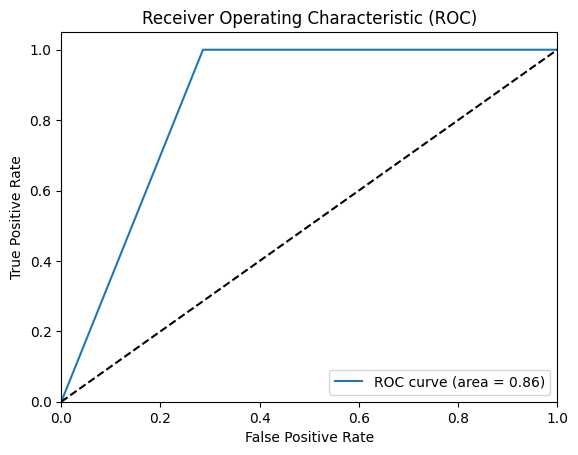

In [61]:
# Tracer la courbe ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()